## Tarea 1-1. Regresión por Gradiente.

### Jorge Morales Pérez.

El objetivo de esta práctica es el de hallar los parámetros de la recta $y=mx+b$ que mejor se adapte a unos puntos o muestras ($X$ e $y$) empleando el método de descenso por el gradiente.

Comprobaremos el funcionamiento del algoritmo con los siguientes puntos:

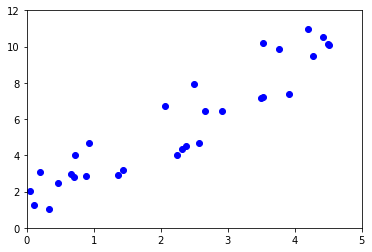

In [43]:
import numpy as np
import matplotlib.pyplot as plt

numberOfSamples = 30

mu, sigma = 0, 1 # mean and standard deviation
noise = np.random.normal(mu, sigma, numberOfSamples)

X = np.random.rand(numberOfSamples)*5
y = 2*X + 1 + noise
 
plt.axis([0, 5, 0, 12])
plt.plot(X,y,'bo')
plt.show()

Procedemos con la elaboración del algoritmo:

In [55]:
# Definimos la funcion del error E:
def error(X, y, m, b):
    E = np.sum((m*X+b-y)**2)
    return E

# Definimos las siguientes funciones auxiliares que emplearemos en el algoritmo:
# Derivada parcial de E respecto de m:
def dm(X,y,m,b):
    devm = np.sum(2*(m*X+b-y)*X)
    return devm

# Derivada parcial de E respecto de b
def db(X,y,m,b):
    devm = np.sum(2*(m*X+b-y))
    return devm

# Actualizacion de los parametros
def update(param, derivparam, l):
    return param - l*derivparam
     
    
#Definimos el algoritmo del método de descenso por el gradiente:
def descensograd(X,y,b,m,l,ite):
    k=0
    while  k<ite:
        deriv_m = dm(X,y,m,b) #hallamos la derivada parcial de E respecto de m
        deriv_b = db(X,y,m,b) #hallamos la derivada parcial de E respecto de b
        m = update(m, deriv_m, l)    #Actualizamos el parametro m
        b = update(b, deriv_b, l)    #Actualizamos el parametro b
        k = k+1
    return b,m    

# Los parametros de entrada del algoritmo son:
l = 0.001           # Parametro de aprendizaje (lambda)
ite = 100000        # Numero de iteraciones del algoritmo
b = 0               # Valor inicial del parametro b
m = 1               # Valor inicial del parametro m 

# Ejecutamos la funcion:
b,m = descensograd(X,y,b,m,l,ite)
print('b =', b, ',  m =', m)
print('Ecuacion de la recta: y =', m,'* X +',b)
print('error =' , error(X, y, m, b))

b = 1.4323340845503094 ,  m = 1.9037014684241387
Ecuacion de la recta: y = 1.9037014684241387 * X + 1.4323340845503094
error = 37.1955114952048


Finalmente, comprobamos que la recta generada es coherente con los puntos del plano que tenemos:

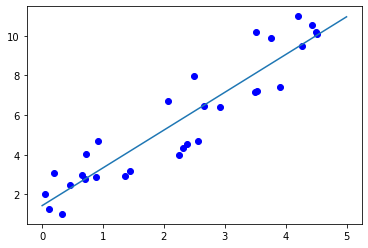

In [56]:
plt.figure()

plt.plot(X,y,'bo')
u = np.linspace(0, 5, 50)
v = m*u + b
plt.plot(u,v)


plt.show()